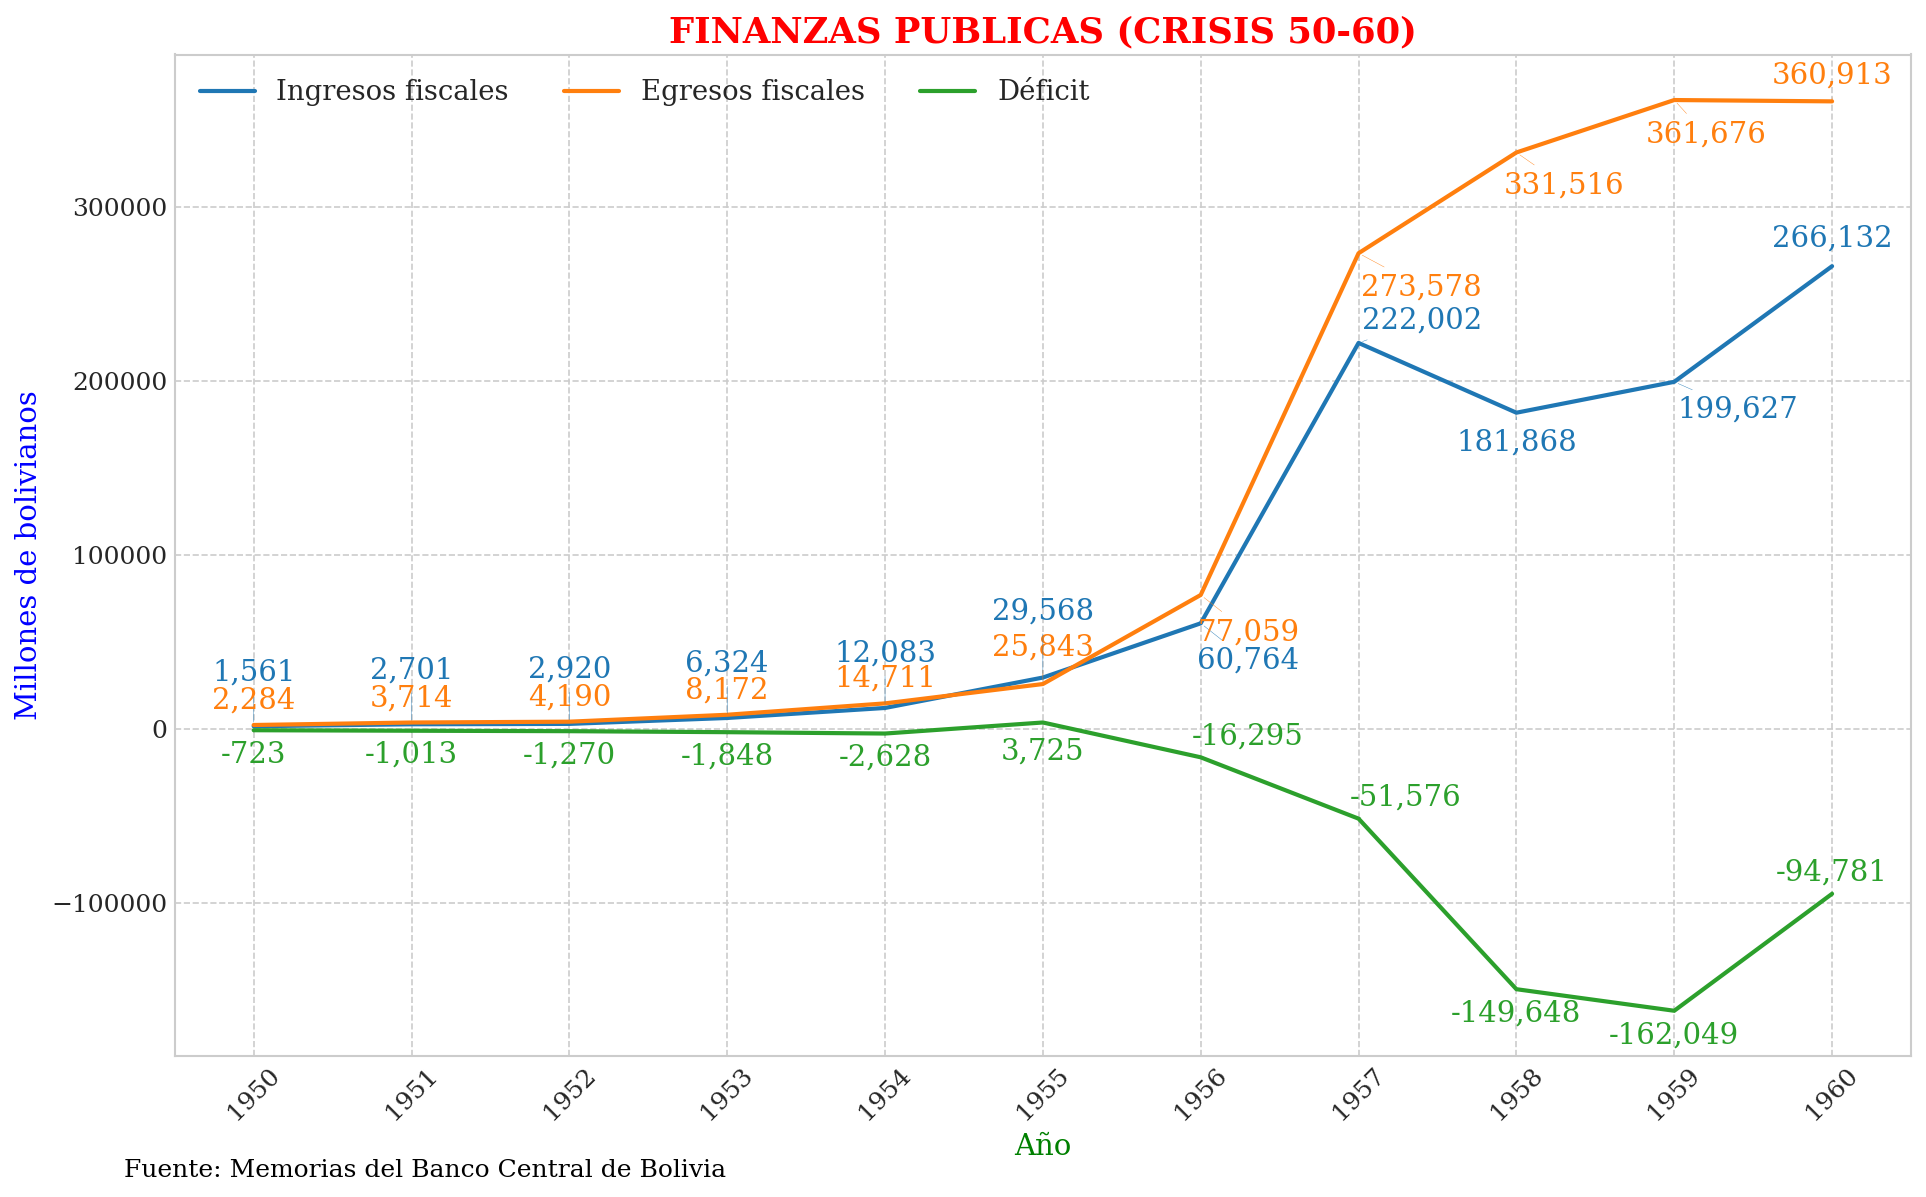

In [1]:
# ─────────────────────────────────────────────────────────────────────
# Importaciones
# ─────────────────────────────────────────────────────────────────────
import sys, os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from func_auxiliares.graficos_utils import (
    get_df, set_style, init_base_plot,
    add_year_value_annotations
)
from func_auxiliares.config import (
    DB_PATH, ASSETS_DIR,
    PERIODOS_PARA_CRISIS
)

# ─────────────────────────────────────────────────────────────────────
# Configuración general
# ─────────────────────────────────────────────────────────────────────
output_dir = ASSETS_DIR / "crisis" / "finanzas_publicas"
output_dir.mkdir(parents=True, exist_ok=True)

set_style()

# ─────────────────────────────────────────────────────────────────────
# Carga de datos
# ─────────────────────────────────────────────────────────────────────
SQL = """
    SELECT
      año,
      ingresos_fiscales,
      egresos_fiscales,
      deficit
    FROM finanzas_publicas
"""
df = get_df(SQL, str(DB_PATH), index_col="año")

# ─────────────────────────────────────────────────────────────────────
# Componentes y parámetros de graficado
# ─────────────────────────────────────────────────────────────────────
componentes = [
    ("ingresos_fiscales", "Ingresos fiscales"),
    ("egresos_fiscales",  "Egresos fiscales"),
    ("deficit",           "Déficit")
]
cols_componentes = [col for col, _ in componentes]
colors = {
    "ingresos_fiscales": "#1f77b4",
    "egresos_fiscales":  "#ff7f0e",
    "deficit":           "#2ca02c"
}

# offsets de anotaciones (dx, dy) — ajústalos según convenga
annotation_offsets = {
    "ingresos_fiscales": {
        1950: (0,  31000),
        1951: (0,  31000),
        1952: (0,  31000),
        1953: (0,  31000),
        1954: (0,  31000),
        1955: (0,  38000),
        1956: (0.3,  -21505),
        1957: (0.4,  13051),
        1958: (0,  -17000),  
        1959: (0.4,  -16000),
        1960: (0,  16000),
    },
    "egresos_fiscales":  {
        1950: (0,  14000),
        1951: (0,  14000),
        1952: (0,  14000),
        1953: (0,  14000),
        1954: (0,  14000),
        1955: (0,  21000),
        1956: (0.3,  -21505),
        1957: (0.4,  -19505),
        1958: (0.3,  -19000),  
        1959: (0.2,  -20000),
        1960: (0,  15000),
    },
    "deficit":           {
        1950: (0,  -14000),
        1951: (0,  -14000),
        1952: (0,  -14000),
        1953: (0, -14000),
        1954: (0,  -14000),
        1955: (0,  -17000),
        1956: (0.3,  12009),
        1957: (0.3,  12000),
        1958: (0,  -14000),  
        1959: (0,  -14000),
        1960: (0,  12000),
    }
}

# ─────────────────────────────────────────────────────────────────────
# Generación de gráficas por subperíodo
# ─────────────────────────────────────────────────────────────────────
for nombre, (ini, fin) in PERIODOS_PARA_CRISIS.items():
    sub = df.loc[ini:fin]
    if sub.empty or len(sub) < 3:
        continue

    years_to_annot = list(sub.index)

    fig, ax = init_base_plot(
        sub,
        series=componentes,
        colors=colors,
        title=f"FINANZAS PUBLICAS ({nombre.upper()})",
        xlabel="Año",
        ylabel="Millones de bolivianos",
        source_text="Fuente: Memorias del Banco Central de Bolivia"
    )

    add_year_value_annotations(
        ax,
        sub,
        years_to_annot,
        cols_componentes,
        annotation_offsets,
        colors,
        arrow_lw=0.2 
    )

    fig.savefig(output_dir / f"finanzas_publicas_{nombre}.png")
    plt.show()
    plt.close(fig)
